# 常微分方程式の周期解の精度保証
$\newcommand{\im}{\mathrm{i}}$
ここでは、フーリエ・スペクトル法で求めた van der Pol 方程式

$$
\frac{d^2 x}{dt^2} - \mu (1-x^2)\frac{dx}{dt} + x = 0
$$

の[近似周期解](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Fourier_spectral_PO.html)をもとに、van der Pol 方程式の周期解の精度保証を行う。今回は Newton-Kantorovich 型定理を用いた方法について紹介する。Newton-Kantorovich 型定理については以前の[記事](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Newton-Kantorovich.html)でも紹介しているので、参照されたい。

$\newcommand{\bx}{\mathrm x}$


## Newton-Kantorovich 型定理を用いた常微分方程式の周期解の数値検証

**定理** (Newton-Kantrovich 型定理)　
$X$, $Y$ をBanach空間、$\mathcal{L}(X,Y)$ を $X$ から $Y$ への有界線形作用素全体の集合とする。有界線形作用素 $A^\dagger \in \mathcal{L}(X,Y)$, $A \in \mathcal{L} (Y,X)$ を考え、作用素 $F: X \rightarrow Y$ が $C^1$-Fréchet微分可能とする。また $A$ が単射で $AF: X \rightarrow X$ とする。いま、$\bar \bx \in X$に対して、正定数 $Y_0$, $Z_0$, $Z_1$, および非減少関数 $Z_2(r)$ ($r>0$) が存在して、次の不等式

$$
    \begin{align*}
    \|AF(\bar \bx)\|_X &\leq Y_0 \\
    \|I - A A^\dagger\|_{\mathcal{L}(X)} &\leq Z_0 \\
    \|A (DF(\bar \bx) - A^\dagger)\|_{\mathcal{L}(X)}&\leq Z_1 \\
    \|A (DF(b) - DF(\bar \bx))\|_{\mathcal{L}(X)} &\leq Z_2 (r)r \quad \mbox{for all}\quad b \in \overline{B(\bar \bx, r)}
    \end{align*}
$$

をみたすとする。このとき、radii polynomialを以下で定義する。

$$
    p(r) := Z_2 (r)r^2 - (1 - Z_1 - Z_0)r + Y_0.
$$

これに対し、$p(r_0)<0$ となる $r_0 > 0$ が存在すれば、$F(\tilde{\bx}) = 0$ をみたす解 $\tilde \bx$ が $b \in \overline{B(\bar \bx, r)}$ 内に一意存在する。

Newton-Kantorovich 型定理を利用する数値検証の際には、$DF(\bar \bx)$ を $F$ の $\bar \bx$ におけるFréchet微分、$A^\dagger$ を $DF(\bar \bx)$ の近似、$A$ を $A^\dagger$ の近似左逆作用素とする。($AA^\dagger \approx I$ とするのが一般的である)

以下で、記号の定義を簡潔に述べ、検証に必要な $Y_0$, $Z_0$, $Z_1$, $Z_2$ の各評価を紹介していく。

## 簡易ニュートン写像

**定義**　 $X$, $Y$ をBanach空間とし, 写像 $F:X\rightarrow Y$ に対して, 

$$
F(\bx)=0 \quad \text{in}~Y
$$

という（非線形）作用素方程式を考える。
このとき写像 $T:X\rightarrow X$ を

$$
T(\bx):=\bx-AF(\bx)
$$

と定義したとき, これを簡易ニュートン写像という。ここで,  $A:Y\rightarrow X$ はある全単射な線形作用素である。このとき, $\bar{\bx}$を $f(\bar{\bx}) \approx 0$ の近似解とし, $\bar{x}$ の近傍を

$$
\begin{array}{ll}
B(\bar{\bx}, r):=\{\bx \in X:\|\bx-\bar{\bx}\|<r\} & \text { (開球) } \\
\overline{B(\bar{\bx}, r)}:=\{\bx \in X:\|\bx-\bar{\bx}\| \leq r\} & \text { (閉球) }
\end{array}
$$

で定義する。このときもし, $\overline{B(\bar{\bx}, r)}$ 上で写像 $T$ が縮小写像となれば, Banachの不動点定理から $F(\bar{\bx})=0$をみたす解 $\tilde{\bx} \in \overline{B(\bar{\bx}, r)}$がただ1つ存在することになる。

このように解の存在を仮定せずに近似解近傍での収束をいう定理を Newton 法の半局所的収束定理という。

### Banach空間

**定義**　Banach空間とは, 完備なノルム空間のことをいう。

### 有界線形作用素

Banach空間 $X$ から $Y$への有界線形作用素全体を

$$
 \mathcal{L}(X, Y):=\{E:X\rightarrow Y:E\text{が線形},\|E\|_{ \mathcal{L}(X, Y)}<\infty \}
$$

とする。ここで $\|\cdot\|_{ \mathcal{L}(X, Y)}$ は作用素ノルム

$$
\|E\|_{\mathcal{L}(X, Y)}:=\sup _{\|\bx\|_{X}=1}\|E \bx\|_{Y}
$$

を表す。そして空間 $\left\langle\mathcal{L}(X, Y),\|\cdot\|_{\mathcal{L}(X, Y)}\right\rangle$ はBanach空間となる。

### Fréchet微分

**定義**　作用素 $F:X\rightarrow Y$が $\bx_0 \in X$ でFréchet微分可能であるとは, ある有界線形作用素 $E:X \rightarrow Y$ が存在して, 

$$
\lim _{\|h\|_{X} \rightarrow 0} \frac{\left\|F\left(\bx_{0}+h\right) - F\left(\bx_{0}\right)-E h\right\|_{Y}}{\|h\|_{X}}=0
$$

が成り立つことをいう。このとき, $E$ は作用素 $F$ の $\bx_0$ におけるFréchet微分といい, $E=DF(\bx_0)$ とかく。　もしも作用素 $F:X\rightarrow Y$ がすべての $\bx\in X$ に対してFréchet微分可能ならば, $F$ は $X$ において $C^1$-Fréchet微分可能という。

### van der Pol方程式の周期解を求める

以前の[記事](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Fourier_spectral_PO.html)と同じ内容なので、簡単に説明する。最初に、前回用いた関数を呼び出す。

In [1]:
versioninfo()

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i9-10900K CPU @ 3.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)


In [2]:
include("FourierChebyshev.jl")

function vanderpol(du, u , μ ,t)
    x,y = u
    du[1] = y
    du[2] = μ*(1- x ^2)*y - x
end

function F_fourier(x, μ, η₀)
    N = length(x)/2
    ω = x[1]
    a = x[2:end]
    (a³,~) = powerconvfourier(a,3)
    eta = sum(a) - η₀

    k = -(N-1):(N-1)
    f = (- k.^2 * ω^2 - μ* im * k * ω .+ 1) .* a + μ*im * k *ω .* a³ / 3

    return [eta;f]
end

function DF_fourier(x, μ)
    N = Int((length(x))/2)
    ω = x[1]
    a = x[2:end]
    k = (-N+1):(N-1)
    (a³,~) = powerconvfourier(a,3)

    DF = zeros(ComplexF64,2N,2N)

    DF[1,2:end] .= 1
    DF[2:end,1] = (- 2*ω*k.^2 - μ*im*k) .* a + μ*im*k .*a³/3

    (~,a2) = powerconvfourier(a,2)
    
    M = zeros(ComplexF64,2*N-1, 2*N-1)

    for j=(-N+1):(N-1)
        M[k.+N, j+N] = μ*im*k*ω.*a2[k.-j.+(2*N-1)]
    end
    
    L = diagm(- k.^2 * ω^2 - μ* im * k * ω .+ 1)
    
    DF[2:end,2:end] = L + M
    return DF
end

DF_fourier (generic function with 1 method)

次に`DifferentialEquations`を用いて、方程式を解く。

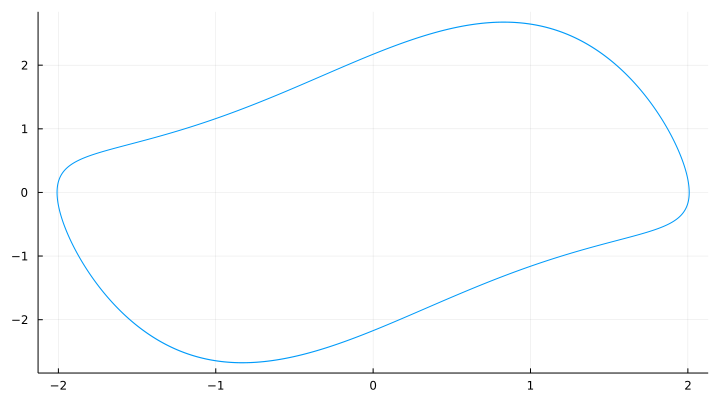

In [3]:
using DifferentialEquations
u₀ = [0.0; 2.0]
tspan = (0.0, 300)
μ = 1.0
prob = ODEProblem(vanderpol, u₀, tspan, μ)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
u = hcat(sol.u...)
ind = floor(Int, length(sol.t)/2)
plot(u[1, ind:end], u[2, ind:end], legend=false, size=(720,400))

次に、大まかな周期を求めて、それを元にフーリエ係数を求める。

In [4]:
#おおよその周期
# a = 30
# b = 36.55
a = 30
app_period = 6.55
timestep = 0.1

f_tmp = sol(a+app_period/2:timestep:a+3*app_period/2)
find_period = abs.(f_tmp .- sol(a))
(~,ind) = findmin(find_period[1,:])
b = a+app_period/2 + timestep*(ind-1)
#calc fouriercoeffs
N = 61 # size of Fourier
a₀ = odefouriercoeffs(sol,N,[a,b])

121-element Vector{ComplexF64}:
 0.00010857243174328509 + 1.4473137487385763e-6im
 0.00010856849261620057 + 4.343718754741951e-6im
 0.00010856075337721457 + 7.246219053864276e-6im
 0.00010854882863007008 + 1.0158381434492842e-5im
 0.00010853325180065452 + 1.3084515275041157e-5im
 0.00010851317536591029 + 1.6028543858772832e-5im
 0.00010848929273196501 + 1.8994569469725978e-5im
  0.0001084607093781199 + 2.198712809591061e-5im
 0.00010842777510930653 + 2.5010377581741317e-5im
 0.00010839007058015082 + 2.806926217031001e-5im
 0.00010834734654050149 + 3.116838879456207e-5im
 0.00010829961187479573 + 3.431296726139662e-5im
  0.0001082461953805161 + 3.750822372123297e-5im
                        ⋮
 0.00010829961187479416 - 3.43129672613968e-5im
 0.00010834734654050015 - 3.116838879456206e-5im
 0.00010839007058015088 - 2.806926217030979e-5im
 0.00010842777510931272 - 2.5010377581739684e-5im
 0.00010846070937811997 - 2.1987128095910765e-5im
 0.00010848929273195124 - 1.899456946978178e-5im
 0.0

Newton法で解を得る。

In [5]:
using LinearAlgebra
# Initial value of Newton method
η₀ = 0.0
x = [2*pi/(b-a); a₀]

# Newton iteration
tol = 5e-12
F = F_fourier(x, μ, η₀)
println("Before step #1, ||F||_1 = $(norm(F,1))")
num_itr = 0

while num_itr ≤ 100
    x = x - DF_fourier(x, μ)\F;
    num_itr += 1
    F = F_fourier(x, μ, η₀)
    println("After step #$(num_itr), ||F||_1 = $(norm(F,1))")
    if norm(F,1) < tol
        break
    end
end

Before step #1, ||F||_1 = 17.12970698527178
After step #1, ||F||_1 = 0.1624905755347185
After step #2, ||F||_1 = 0.0009482909730235743
After step #3, ||F||_1 = 1.9840271928969632e-8
After step #4, ||F||_1 = 2.0142943381863406e-13


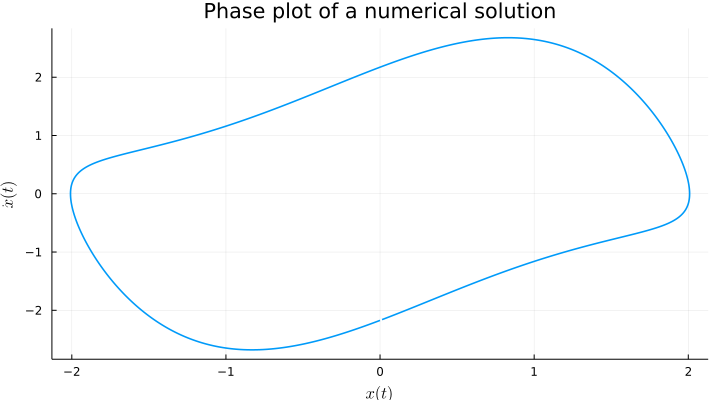

In [6]:
plot_solution(x,3)

方程式の周期解を求めることができたところで、Newton-Kantorovich 型定理を用いた数値検証を行う。

### 許容重みの定義

**定義**　点列 $w = (w_k)_{k \in \mathbb{Z}}$ について、

$$
    w_k > 0 \quad (\forall k \in \mathbb{Z}) \\
    w_{n+k} \leq w_n w_k \quad ( \forall n,k \in \mathbb{Z})
$$

が成立するとき、許容重みであるという。

**例**
$s>0, \nu \leq 1$ に対して、

$$
    w_k = (1 + |k|)^s \nu^{|k|} , \quad k \in \mathbb{Z}
$$

と定義される $w_k$ は許容重みである。この許容重みであるような点列 $w_k$ に対して、次のような重み付き $\ell^1$ 空間が定義できる。

$$
     \ell^1_w := \left\{ a = (a_k)_{k \in \mathbb{Z}}: a_k \in \mathbb{C}, \| a \|_w := \sum_{k \in \mathbb{Z} }|a_k | w_k < \infty \right\}.
$$

### Banach空間 $X$

Banach空間$X$を次のように定める。はじめに重み付き $\ell^1$ 空間を重み $w_k=\nu^{|k|}$ ($\nu=1.05$) として次のように定める。
$$
\ell^1_\nu := \left\{ a = (a_k)_{k \in \mathbb{Z}}: a_k \in \mathbb{C},\ \| a \|_w := \sum_{k \in \mathbb{Z} }|a_k | \nu^{|k|} < \infty \right\}.
$$

そして、検証に用いる関数空間 $X$ は

$$
    X := \mathbb{C} \times \ell^1_{\nu}, \quad \bx = (\omega, a), \quad \omega \in \mathbb{C}, \quad a \in \ell^1_\nu
    % \ell^1_\nu := \left\{ a = (a_k)_{k \in \mathbb{Z}}: a_k \in \mathbb{C},\ \| a \|_w := \sum_{k \in \mathbb{Z} }|a_k | \nu^{|k|} < \infty \right\},\quad \nu>1 \\
$$

と定め、そのノルムを

$$
    \| \bx \|_X := \max\{ |\omega|, \| a \|_w \}
$$

として定義する。このとき、$X$ はBanach空間となる。

次に、関数`DF_fourier`で計算している $F^{(N)}(\bx^{(N)})$ のヤコビ行列は、次のような形をしている。


$$
    DF^{(N)}(\bx^{(N)}) =
    \left[\begin{array}{c|ccc}
    0 & 1 & \dots & 1\\\hline
    \vdots & &\vdots&\\
    \partial_{\omega}f_k& \dots & \partial_{a_j}f_k & \dots\\
    \vdots & &\vdots& 
    \end{array}\right]\in\mathbb{C}^{2N\times 2N}\quad (|k|,|j|<N).
$$

ここで

$$
    \begin{cases}
    \partial_\omega f_k = (-2k^2 \omega - \mu \im k) a_k + \frac{\mu \im k}{3}(a*a*a)_k & (|k|<N)\\
    \partial_{a_j} f_k = (-k^2 \omega^2 - \mu \im k \omega + 1) \delta_{kj} + \mu \im k \omega (a*a)_{k-j}&(|k|,|j|<N)
    \end{cases},\quad \delta_{kj} = \begin{cases} 1 & (k=j)\\ 0 & (k\neq j)
    \end{cases}
$$

である。ヤコビ行列の各要素の添字との対応は

$$
\left(DF^{(N)}(\bx^{(N)})\right)_{\ell,m} = 
\begin{cases}
0 \ &(\ell=m=1) \\
1 \ &(\ell=1, m = 2 \cdots 2N) \\
\partial_\omega f_k &(\ell = 2 \cdots 2N, m = 1,~\mbox{i.e.},~\ell = k + N + 1~\mbox{for}~|k|<N)\\
\partial_{a_j} f_k &(\ell,m = 2 \cdots 2N,~\mbox{i.e.},~\ell = k + N + 1~\mbox{for}~|k|<N,~m = j + N + 1~\mbox{for}~|j|<N)
\end{cases}
$$


### 作用素$A^\dagger$ , $A$ の定義

#### $A^\dagger$ の定義

まず、Banach空間 $X= \mathbb{C} \times \ell^1_\nu$ から $Y=\mathbb{C} \times \ell^1_{\nu'}$ ($\nu'<\nu$) と設定し、$A^\dagger$ を $A^\dagger \in \mathcal{L}(X,Y)$ として、$b=(b_0,b_1)\in \mathbb{C}\times \ell^1_\nu = X$に対して、 $A^\dagger b = ((A^\dagger b)_0 , (A^\dagger b)_1 )$ と作用するように定義する。ここで、 $A^\dagger$ を形式的に見ると、

$$
    A^\dagger = 
    \left[\begin{array}{c|ccc}
    0 & 1 &  \cdots  & 1 & \cdots & {0} & \cdots  \\\hline
    \vdots & &  \vdots & & & & \\
    \partial_\omega f_k & \cdots & \partial_{a_j} f_k & \cdots & & \Large{0} \\
    \vdots& &  \vdots & & & & \\
    \vdots & & & & \lambda_N & & \Large{0} \\
    0 & & \Large{0} & & & \lambda_{N+1} & \\
    \vdots & & & & \Large{0} & & \ddots
    \end{array}\right]
    =
    \left[
    \begin{array}{c|c}
    0 & A_{a,0}^\dagger \\
    \hline 
    A_{\omega, 1}^\dagger & A_{a,1}^\dagger
    \end{array}
    \right].
$$

このことから、 $A^\dagger b$ は、

$$
    \begin{align*}
    A^\dagger b = 
    \begin{bmatrix}
    0 & A_{a,0}^\dagger \\
    A_{\omega ,1}^\dagger & A_{a,1}^\dagger
    \end{bmatrix}
    \begin{bmatrix}
    b_0 \\
    b_1
    \end{bmatrix}
    =
    \begin{bmatrix}
    A^\dagger_{a,0} b_1 \\
    A^\dagger_{\omega ,1} b_0 + A^\dagger_{a,1} b_1
    \end{bmatrix}
    =: 
    \begin{bmatrix}
    (A^\dagger b)_0 \\
    (A^\dagger b)_1
    \end{bmatrix}
    \end{align*}
$$

と表すことができ、

$$
    (A^\dagger b)_0 = \sum_{|k|<N} (b_1)_k
$$

$$
    ((A^\dagger b)_1 )_k := 
    \begin{cases}
    \partial_\omega f_k b_0 + \sum_{|j|<N} \partial_{a_j} f_k (b_1 )_j, &|k| < N  \\
    \lambda_k (b_1)_k, &|k| \ge N,
    \end{cases}
    \quad \lambda_k := -k^2 \omega^2 - \mu \im k \omega + 1
$$

と書ける。またこのとき、$(A^\dagger b)_0$と$(A^\dagger b)_1$はそれぞれ

$$
    \begin{align*}
    (A^\dagger b)_0 = A^\dagger_{a,0} b_1 = \sum_{|k|<N} (b_1)_k \in \mathbb{C} \\
    (A^\dagger b)_1 = A^\dagger_{\omega, 1} b_0 + A^\dagger_{a,1} b_1 \in \ell^1_{\nu^\prime}.
    \end{align*}
$$

**注意**　上のtail部分は実際には添字$k$に対して正負両方の向きに伸びているが、今回は一方向のみ表記している。

#### $A$ の定義

次に作用素 $A$ について考える。 

$$
    A^{(N)} = 
    \begin{bmatrix}
    A_{\omega,0}^{(N)} & A_{a,0}^{(N)} \\
    A_{\omega,1}^{N)} & A_{a,1}^{(N)}
    \end{bmatrix}
    \approx DF^{(N)}(\bar{\bx})^{-1} \in \mathbb{C}^{2N \times 2N}
$$

をJacobi行列の近似逆行列とする。そして、$A \in \mathcal{L}(Y,X)$ として、$b = (b_0, b_1 ) \in X$に対して、 $Ab = ((Ab)_0, (Ab)_1)$ と作用するように定義する。ここで、

$$
    \begin{align*}
    (Ab)_0 &= A_{\omega,0}^{(N)}b_0 + A_{a,0}^{(N)}b_1^{(N)} \\
    (Ab)_1 &= A_{\omega,1}^{(N)}b_0 + A_{a,1}b_1
    \end{align*}
$$

ただし、無限次元の $A_{a,1}b_1$ は以下のようになる。

$$
    (A_{a,1} b_1 )_k = 
    \begin{cases}
    (A_{a,1}^{(N)}b_1^{(N)})_k &(|k| < N) \\
    (b_1)_k / \lambda_k &(|k| \ge N).
    \end{cases}
$$

この定義を形式的に見ると

$$
\begin{align*}
    A &=
    \left[
    \begin{array}{c|cc}
    A^{(N)}_{\omega , 0} & A^{(N)}_{a,0} & 0 & \cdots & 0 \\
    \hline
    A^{(N)}_{\omega ,1} & A^{(N)}_{a,1} &  &\Large{0} &\\
    0 & &\frac1{\lambda_{N}} &  & \\
    \vdots & & & \frac1{\lambda_{N+1}} & \\
    0 & & \Large{0} & & \ddots
    \end{array}
    \right]=
    \left[
    \begin{array}{c|c}
    0 & A_{a,0} \\
    \hline 
    A_{\omega, 1} & A_{a,1}
    \end{array}
    \right].
\end{align*}
$$

と表記できる。

### $Y_0, Z_0, Z_1, Z_2$ の評価

(i) $Y_0$

$$
    \|AF(\bar \bx)\|_X \leq Y_0
$$

(ii) $Z_0$

$$
    \|I - AA^\dagger\|_{\mathcal{L}(X)} \leq Z_0
$$

(iii) $Z_1$

$$
    \|A(DF(\bar \bx) - A^\dagger) c\|_X \leq Z_1 , \quad c \in \overline{B(0,1)}
$$

また、ここでいう$\overline{B(0,1)}$とは$\|c\|_X = 1$ということである。

(iv) $Z_2$

$b \in \overline{B(\bar \bx, r)}, h \in \overline{B(0,1)}$ として、

$$
    \|A(DF(b) -DF(\bar \bx)) h\|_X \leq Z_2(r)r
$$

以上の(i)から(iv)によって、Newton-Kantorovich type argument による数値検証が可能になる。では、実際に(i)～(iv)の値を計算する。

<!-- まず、

$$
\begin{align*}
    A^\dagger &=
    \left[
    \begin{array}{c|cc}
    0 & \cdots & \partial_a \eta & \cdots & 0 & \cdots & 0 \\
    \hline
    \vdots &  & \vdots & & & & \\
    \partial_\omega f_{k}^{(N)} & \cdots & \partial_{a_j} f_{k}^{(N)} & \cdots & & & \\
    \vdots & & \vdots & & \Large{0} & \\
    0 & & & \lambda_{N} & & & \\
    \vdots & & & & \lambda_{N+1} & & \\
    0 & & \Large{0} & & & \ddots
    \end{array}
    \right]=
    \left[
    \begin{array}{c|c}
    0 & A_{a,0}^\dagger \\
    \hline 
    A_{\omega, 1}^\dagger & A_{a,1}^\dagger
    \end{array}
    \right]
\end{align*}
$$

と表記する。また $\eta (a) := \sum_{|k|<N} a_k - \eta_0=0\ (\eta_0 \in \mathbb{R})$ とし、この行列は $b = (b_0 , b_1) \in \mathbb{C} \times \ell^1_\nu$ に作用する。

$A^\dagger$から順に考える。

$$
    \begin{align*}
    A^\dagger b &= 
    \begin{bmatrix}
    0 & A_{a,0}^\dagger \\
    A_{\omega ,1}^\dagger & A_{a,1}^\dagger
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_0 \\
    b_1
    \end{bmatrix} \\
    &=
    \begin{bmatrix}
    A^\dagger_{a,0} b_1 \\
    A^\dagger_{\omega ,1} b_0 + A^\dagger_{a,1} b_1
    \end{bmatrix}
    =: 
    \begin{bmatrix}
    (A^\dagger b)_0 \\
    (A^\dagger b)_1
    \end{bmatrix}
    \end{align*}
$$

と定義する。またこのとき、$(A^\dagger b)_0$と$(A^\dagger b)_1$はそれぞれ

$$
    \begin{align*}
    (A^\dagger b)_0 = A^\dagger_{a,0} b_1 = \partial_a \eta \cdot b^{(N)}_1 \in \mathbb{C} \\
    (A^\dagger b)_1 = A^\dagger_{\omega, 1} b_0 + A^\dagger_{a,1} b_1 \in \ell^1_{\nu^\prime}.
    \end{align*}
$$

ただし、

$$
    \begin{align*}
    A^\dagger_{\omega,1} &= \partial_\omega f^{(N)}, \\
    (A^\dagger_{a,1})_k &= 
    \begin{cases}
    (\partial_a f^{(N)} b^{(N)}_1)_k & (|k| < N) \\
    \lambda_k (b_1)_k &(|k| \geq N)
    \end{cases}
    \end{align*}
$$

である。 -->

#### $Y_0$を計算する

$$
    F(\bar x) = (\delta_0 , \delta_1) \in \mathbb{C} \times \ell^1_{\nu'}
$$

とすると、$A$の定義より、

$$
    \|AF(\bar \bx)\|_X \leq \max\left\{|A^{(N)}_{\omega, 0} \delta_0 + A^{(N)}_{a,0} \delta^{(N)}_1|, \|A^{(N)}_{\omega,1} \delta_0 + A_{a,1} \delta^{(N)}_1 \|_{w} + \sum_{|k| > N} \left| \frac{(\delta^{\infty}_1)_k}{\lambda_k} \right| \nu^{|k|}\right\}=:Y_0.
$$


ここで、$\delta_1=(\delta_1^{(N)}, \delta^{(\infty)}_1)\in\mathbb{C}^{2*3(N-1)+1}$であり、

$$
    (\delta_1)_k = 
    \begin{cases}
    \delta_1^{(N)} &(k < |N|) \\
    \delta_1^{(\infty)} &(k \geq |N|)
    \end{cases}
$$

と表す。

In [7]:
include("IntervalFunctions.jl")

ix = map(Interval,x)
iω̄ = map(Interval,real(x[1]))
iā = map(Interval,x[2:end])
ν  = 1.05

function DF_fourier(x::Vector{Complex{Interval{T}}}, μ) where T
    N = Int((length(x))/2)
    ω = x[1]
    a = x[2:end]
    k = (-N+1):(N-1)
    (a³,~) = powerconvfourier(a,3)

    DF = zeros(Complex{Interval{T}},2N,2N)

    DF[1,2:end] .= 1
    DF[2:end,1] = (- 2*ω*k.^2 - μ*im*k) .* a + μ*im*k .*a³/3

    (~,a2) = powerconvfourier(a,2)
    
    M = zeros(Complex{Interval{T}},2*N-1, 2*N-1)

    for j=(-N+1):(N-1)
        M[k.+N, j+N] = μ*im*k*ω.*a2[k.-j.+(2*N-1)]
    end
    
    L = diagm(- k.^2 * ω^2 - μ* im * k * ω .+ 1)
    
    DF[2:end,2:end] = L + M
    return DF
end

iDF = DF_fourier(ix, μ);
iA  = map(Interval,inv(mid.(iDF)))
Aₐ₀ = iA[1,2:end]
Aₐ₁ = iA[2:end,2:end]
Aₒ₁ = iA[2:end,1];

function F_fourier_ext(x::Vector{Complex{Interval{T}}}, μ, η₀) where T
    N = length(x)/2
    ω = x[1]
    a = [zeros(Complex{Interval{T}},2*(Int(N)-1));x[2:end]; zeros(Complex{Interval{T}},2*(Int(N)-1))] 
    (~,a³) = powerconvfourier(x[2:end],3)
    eta = sum(a) - η₀

    k = -3*(N-1):3*(N-1)
    f = (- k.^2 * ω^2 - μ* im * k * ω .+ 1) .* a + μ*im * k *ω .* a³ / 3

    return [eta;f]
end

function wnorm(a, ν)
    N = (length(a)+1)/2 # length(a) = 2*N-1
    k = (-N+1):(N-1)
    w = ν.^abs.(k)
    return sum(abs.(a).*w)
end

δ  = F_fourier_ext(ix, μ, η₀)
δ₀ = δ[1]
δ₁ = δ[2:end]
δ₁_N = δ₁[2*(N-1)+1:end-2*(N-1)] #N-1 ,1 , N-1 = 2N-1
δ₁[2*(N-1)+1:end-2*(N-1)] .= 0
δ₁_tail = δ₁

λₖ(k,ω) = - k.^2 * ω^2 - μ* im * k * ω .+ 1


k_tail = -3*(N-1):3*(N-1)
Y₀ = sup(max(abs(iA[1,1]*δ₀ + dot(Aₐ₀,δ₁_N)), wnorm(Aₒ₁*δ₀ + Aₐ₁*δ₁_N, ν) + wnorm(δ₁_tail./(abs.(λₖ(map(Interval,Vector(k_tail)),iω̄))), ν)))

@show Y₀;

Y₀ = 1.0271620878883928e-10


#### $Z_0$を計算する 

$$
    % \begin{align*}
    B := I - AA^\dagger = \begin{bmatrix}
          B_{\omega , 0} & B_{a,0} \\
          B_{\omega, 1} & B_{a,1}
         \end{bmatrix}
    % \end{align*}
$$

この $B$ を $c \in \overline{B(0,1)}, \| c \|_X \le 1$ である $c = (c_0, c_1)$ に作用させると、

$$
    \begin{align*}
    (Bc)_0 &= B_{\omega,0} c_0 + B_{a,0}c_1 \\
    (Bc)_1 &= B_{\omega,1} c_0 + B_{a,1}c_1
    \end{align*}
$$

$(Bc)_0$ はスカラ値なので、

$$
\begin{align*}
|B_{a,0} c_1| &\leq \sum_{k \in \mathbb{Z}}|(B_{a,0})_k||(c_1)_k| \\
&= \sum_{k \in \mathbb{Z}} \frac{|(B_{a,0})_k|}{w_k} |(c_1)_k|w_k \\
&\leq \underset{k < |N|}{\max} \frac{|(B_{a,0})_k|}{w_k} \sum_{k \in \mathbb{Z}} |(c_1)_k|w_k \\
&\leq \underset{k < |N|}{\max} \frac{|(B_{a,0})_k|}{w_k}, \quad (\sum_{k \in \mathbb{Z} }|(c_1)_k|w_k = \|c_1 \|_w \le 1),
\end{align*}
$$

上より、

$$
|(Bc)_0| \leq |B_{\omega,0}| + \underset{|k| < N}{\max} \frac{|(B_{a,0})_k|}{\omega_k} = Z_0^{(0)}
$$



またここで、作用素 $M:\ell_{\nu}^1\to \ell_{\nu}^1$ の作用素ノルムについて以下の補題を準備する。

**補題**　行列 $M^{(N)}$ を $M^{(N)} \in \mathbb{C}^{(2N-1) \times (2N-1)}$ 、双方向の複素無限点列(bi-infinite sequence of complex numbers) を $\{ \delta_k \}_{|k| \geq N}$ と定義する。ここで、 $\delta_N > 0$ であり、

$$
    |\delta_k| \leq \delta_N \text{ for all } |k| \geq N
$$

を満たすとする。そして、$a = (a_k)_{k \in \mathbb{Z}} \in \ell^1_\nu$ に対して 
$a^{(N)} = (a_{-N+1} , \dots, a_{N-1}) \in \mathbb{C}^{2N-1}$と表し、
作用素 $M:\ell_{\nu}^1\to \ell_{\nu}^1$ を以下のように定義する。

$$
    [Ma]_k := 
    \begin{cases}
    [M^{(N)}a^{(N)}]_k, & |k| < N \\
    \delta_k a_k ,& |k| \geq N
    \end{cases}
$$

このとき、 $M$ は有界線形作用素であり、

$$
    \|M\|_{\mathcal{L}(\ell^1_\nu)} \leq \max{(K,\delta_N)},\quad K := \max_{|n|<N} \frac{1}{\nu^{|n|}} \sum_{|k|<N} |M_{k,n}| \nu^{|k|}
$$

と評価される。

上の補題を利用すると、

$$
    \| (Bc)_1 \|_w \leq \| B_{\omega,1} \|_w + \| B_{a,1} \|_{\mathcal{L}(\ell_\nu^{1})} = Z_0^{(1)}
$$

が評価可能となり、結論としては、求めたい $Z_0$ は $Z_0 := \{Z_0^{(0)}, Z_0^{(1)}\}$ となる。

In [8]:
# Z₀ bounds
function wnorm_mat(A, ν)
    m = size(A,1) # m = 2*N-1
    N = (m+1)/2
    k = -N+1:N-1
    w = ν.^abs.(k)
    return maximum(sum(w.*abs.(A),dims=1)./w')
end

function wsnorm(a, ν) # the input should be vector
    # the norm of dual space of the weighted ell^1
    m = length(a) # m = 2*N-1
    N = (m+1)/2
    k = -N+1:N-1
    w = ν.^abs.(k)
    return maximum(abs.(a)./w)
end

B = I - iA*iDF #2N × 2N
Z₀_0  = abs(B[1,1]) + wsnorm(B[1,2:end], ν) 
Z₀_1 = wnorm(B[2:end,1],ν) + wnorm_mat(B[2:end,2:end],ν)
Z₀ = sup(max(Z₀_0, Z₀_1))
println("Z₀ = $Z₀")

Z₀ = 4.763216193309887e-12


#### $Z_1$ を計算する

$$
    \|A(DF(\bar{\bx}) - A^\dagger ) c \|_X \leq Z_1,\quad c = (c_0, c_1) \in \overline{B(0,1)} \Leftrightarrow \|c \|_X\leq 1.
$$

点列 $z$ を下記のように定義する。

$$
    z := (DF(\bar{\bx}) - A^\dagger ) c = 
    \begin{bmatrix}
    z_0 \\
    z_1
    \end{bmatrix}.
$$

ここで、$DF(\bar{\bx})$ と $A^\dagger$ は

$$
    DF(\bar{\bx}) =
    \left[\begin{array}{c|ccc}
    0 & \cdots & 1 & \cdots \\\hline
    \vdots & &\vdots&\\
    \partial_{\omega}f_k& \dots & \partial_{a_j}f_k & \dots\\
    \vdots & &\vdots& 
    \end{array}\right], \\
    A^\dagger =
    \left[
    \begin{array}{c|cc}
    0 & \cdots & \partial_a \eta & \cdots & 0 & \cdots & 0 \\
    \hline
    \vdots &  & \vdots & & & & \\
    \partial_\omega f_{k}^{(N)} & \cdots & \partial_{a_j} f_{k}^{(N)} & \cdots & & & \\
    \vdots & & \vdots & & \Large{0} & \\
    0 & & & \lambda_{N} & & & \\
    \vdots & & & & \lambda_{N+1} & & \\
    0 & & \Large{0} & & & \ddots
    \end{array}
    \right], \\
    \lambda_k := -k^2 \omega^2 - \mu \im k \omega + 1
$$

と表される。すると $z_0$ は、

$$
    z_0 = \sum_{|k| \ge N} (c_1 )_k,\quad |z_0| \leq \frac{1}{w_{N}} \sum_{|k| \ge N} |(c_1)_k| w_k \leq \frac{1}{w_{N}}.
$$

次に、 $z_1$ について考える。 $DF(\bar{\bx})c$ 部分は

$$
    \begin{align*}
    ((DF(\bar{\bx})c)_1)_k &= \partial_\omega f_k c_0 + \partial_a f_k c_1 \\
    &= \frac{\partial \lambda_k}{\partial \omega} c_0 \bar{a}_k + \frac{\mu \im k}{3}(\bar{a} * \bar{a} * \bar{a})_k c_0 + \lambda_k (c_1)_k + \mu \im k \omega (\bar{a} * \bar{a} * c_1)_k,\quad k \in \mathbb{Z}
    \end{align*}
$$

と書け、 $|k| \geq N$ で　$\bar{a}_k = 0$ より、 $c_1 = c_1^{(N)} + c_1^{(\infty)}$ として、

$$
    (z_1)_k = 
    \begin{cases}
    \mu \im k \omega (\bar{a} * \bar{a} * c_1^{(\infty)})_k , \quad |k| < N\\
    \frac{\mu \im k}{3}(\bar{a} * \bar{a} * \bar{a})_k c_0 + \mu \im k \omega (\bar{a} * \bar{a} * c_1)_k, \quad |k| \geq N
    \end{cases}
$$

と表せる。
ここから、 $z_1$ の絶対値をとると、 $|k| < N$ で

$$
    |(z_1)_k| \leq |\mu \im k \omega| \max
    \left\{ 
    \max_{k-N+1 \leq j \leq -N} \frac{|(\bar{a} * \bar{a})_{k-j}|}{w_j},
    \max_{N \leq j \leq k+N-1} \frac{|(\bar{a} * \bar{a})_{k-j}|}{w_j}
    \right\}=:\zeta,\quad \zeta = (\zeta_k)_{|k| < N} \in \mathbb{R}^{2N-1}.
$$

最後に、 $Z_1$ を評価していく。 $Z_1^{(0)}$ の評価は

$$
    \begin{align*}
    |(A(DF(\bar{\bx}) - A^\dagger)c)_0| &= |(Az)_0| \\
    &\leq |A_{\omega,0}^{(N)}| |z_0| + |A_{a,0}^{(N)}| | z_1^{(N)}| \\
    &\leq \frac{|A_{\omega,0}^{(N)}|}{w_{N}} + |A_{a,0}^{(N)}|\zeta \\
    &=: Z_1^{(0)}
    \end{align*}
$$

$Z_1^{(1)}$ の評価は

$$
    \begin{align*}
    \|(A(DF(\bar{\bx}) - A^\dagger)c)_1 \|_w &= \|(Az)_1 \|_w \\
    &= \| A_{\omega,1}^{(N)} z_0 + A_{a,1} z_1 \|_w \\
    &\leq \frac{\|A_{\omega,1}^{(N)} \|_w}{w_{N}} + \sum_{|k|<N} (|A_{a,1}^{(N)}| \zeta)_k w_k + \sum_{|k| \geq N} \frac{|\mu \im k (\bar{a}*\bar{a}*\bar{a})_k |}{3|\lambda_k |} w_k  + \sum_{|k| \geq N} \frac{ |\mu \im k \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\lambda_k|} w_k \\
    &\leq \frac{\|A_{\omega,1}^{(N)} \|_w}{w_{N}} + \sum_{|k|<N} (|A_{a,1}^{(N)}| \zeta)_k w_k + \sum_{N\le |k| \le 3(N-1)} \frac{|\mu \im k (\bar{a}*\bar{a}*\bar{a})_k |}{3|\lambda_k |} w_k  + \sum_{|k| \geq N} \frac{ |\mu \im k \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\lambda_k|} w_k \\
    &\leq \frac{\| A_{\omega,1}^{(N)} \|_w}{w_{N}} + \| |A_{a,1}^{(N)}| \zeta \|_w + \sum_{N\le |k| \le 3(N-1)} \frac{|\mu \im k (\bar{a}*\bar{a}*\bar{a})_k |}{3|\lambda_k |} w_k  + \frac{1}{N} \frac{\mu \omega \|\bar{a} \|_{w}^2}{\omega^2 - \frac{1}{N^2}} \\
    % &\leq \frac{\| A_{\omega,1}^{(N)} \|_w}{w_{N}} + \| |A_{a,1}^{(N)} \zeta \|_w + \frac{1}{N} \frac{\mu \| \bar{a} \|^3_w}{3(\omega^2 - \frac{1}{N^2})} + \frac{1}{N} \frac{\mu \omega \|\bar{a} \|_{w}^2}{\omega^2 - \frac{1}{N^2}} \\
    &=: Z_1^{(1)}
    \end{align*}
$$

よって、

$$
    Z_1 := \max\{Z_1^{(0)}, Z_1^{(1)}\}
$$

**$Z_1^{(1)}$ の評価の補足**

$$
\sum_{|k| \geq N} \frac{ |\mu \im k \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\lambda_k|} w_k \\
$$

は、$\lambda_k := -k^2 \omega^2 - \mu \im k \omega + 1$ より、

$$
\begin{align*}
\sum_{|k| \geq N} \frac{ |\mu \im k \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\lambda_k|} w_k 
&= \sum_{|k| \geq N} \frac{ |\mu \im k \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|-k^2 \omega^2 - \mu \im k \omega + 1|} w_k \\
&\leq \sum_{|k| \geq N} \frac{1}{|k|} \frac{ |\mu \im \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\omega^2 + \frac{\mu \im \omega}{k} - \frac{1}{k^2}|} w_k \\
&\leq \sum_{|k| \geq N} \frac{1}{|k|} \frac{ |\mu \im \omega ( \bar{a} * \bar{a} * c_1 )_k |}{|\omega^2 - \frac{1}{k^2}|} w_k \\
&\leq \frac{1}{N} \frac{\mu \im \omega \|\bar{a} \|_{w}^2}{\omega^2 - \frac{1}{N^2}}
\end{align*}
$$

In [9]:
# Z₁ bounds
(~,ia²) = powerconvfourier(iā,2)
(~,ia³) = powerconvfourier(iā,3)

ζ = map(Interval,zeros(2*N-1))
for ell = -N+1:N-1
  j = ell-2*(N-1) : -N
  if isempty(j)
    ζ₁ = -1
  else
    wⱼ = ν.^abs.(j)
    ζ₁ = abs(μ*im*ell*iω̄) * maximum( abs.( ia²[ell.-j.+2*N.-1])./wⱼ)
  end
  j = N:ell+2*(N-1)
  if isempty(j) 
    ζ₂ = -1
  else
    wⱼ = ν.^abs.(j)
    ζ₂ = abs(μ * im * ell * iω̄)* maximum(  abs.(ia²[ell.-j.+2*N.-1])./wⱼ)
  end
  ζ[ell+N] = max(ζ₁, ζ₂)
end

conv = map(Interval,0)
for k = N:2*(N-1)
    #positive
    conv += abs(μ*im*k*ia³[k+4(N-1)+1])*ν^(k)/(3*abs(λₖ(k,iω̄)))    
    #negative
    conv += abs(-μ*im*k*ia³[-k+2*(N-1)+1]*ν^(k))/(3*abs(λₖ(-k,iω̄)))
end

wₙ = ν^(N)
iā_norm = wnorm(iā,ν)
Z₁_0 = abs(iA[1,1])/wₙ + dot(abs.(Aₐ₀),ζ)
Z₁_1 = wnorm(Aₒ₁,ν)/wₙ + wnorm(abs.(Aₐ₁)*ζ,ν) + conv +abs(μ*im*iω̄)*iā_norm^2/(N*iω̄^2 - 1/N)
Z₁ = sup(max(Z₁_0,Z₁_1))
println("Z₁ = $Z₁")

Z₁ = 0.2707256416561851


#### $Z_2$ を計算する

$b \in \overline{B(\bar{\bx},r)}, c = (c_0, c_1) \in \overline{B(0,1)}$ について

$$
    \| A(DF(b) - DF(\bar{\bx}))c \|_X \leq Z_2 (r)r
$$

を考える。まず $z$ を、

$$
    z := (DF(b) - DF(\bar{\bx}))c = 
    \begin{bmatrix}
    z_0 \\
    z_1 \\
    \end{bmatrix}
    =
    \begin{bmatrix}
    0 \\
    z_1 \\
    \end{bmatrix}
$$

と定義する。 $z_0 = 0$ となるので、 $z_1$ だけを考えればよく、

$$
    (z_1)_k := (\partial_\omega f_k (b) - \partial_\omega f_k (\bar{\bx})) c_0 + [(\partial_a f(b) - \partial_a f(\bar{\bx}))c_1]_k , \quad k \in \mathbb{Z}
$$

と書ける。

$b = (\omega, (a_k)_{k \in \mathbb{Z}}), \bar{\bx} = (\bar{\omega}, (\bar{a}_k)_{|k| < N})$ として、第1項は、

$$
    \begin{align*}
    (\partial_\omega f_k (b) - \partial_\omega f_k (\bar{\bx}))c_0
    &= \left[((- 2 k^2 \omega - \mu \im k)a_k + \frac{\mu \im k}{3} (a*a*a)_k) - (( - 2 k^2 \bar{\omega} - \mu \im k) \bar{a}_k + \frac{\mu \im k}{3}(\bar{a}*\bar{a}*\bar{a})_k)\right]c_0 \\
    &= \left[ -2k^2 \omega (a_k - \bar{a}_k) - 2 k^2 (\omega - \bar{\omega}) \bar{a}_k - \mu \im k (a_k - \bar{a_k}) + \frac{\mu \im k}{3}((a*a*a)_k - (\bar{a}*\bar{a}*\bar{a})_k) \right] c_0
    \end{align*}
$$

と書ける。そして、第2項は、

$$
    \begin{align*}
    [(\partial_a f(b) - \partial_a f(\bar{\bx}))c_1]_k &= (-k^2 \omega^2 - \mu \im k \omega +1)(c_1)_k + \mu \im k \omega (a*a*c_1)_k - [(-k^2 \bar{\omega}^2 - \mu \im k \bar{\omega} +1)(c_1)_k + \mu \im k \bar{\omega} (\bar{a}*\bar{a}*c_1)_k \\
    &= [ -k^2 (\omega + \bar{\omega})(\omega - \bar{\omega}) - \mu \im k (\omega - \bar{\omega})](c_1)_k + \mu \im k \omega ((a+\bar{a})*(a-\bar{a})*c_1)_k + \mu \im k (\omega - \bar{\omega}) (\bar{a}*\bar{a}*c_1)_k
    \end{align*}
$$

と書ける。$(Az)_0, (Az)_1$ は、

$$
    (Az)_0 = A_{a,0}^{(N)} z_1^{(N)} \\
    (Az)_1 = A_{a,1}z_1
$$

より、

$$
    \| Az \|_X = \max \left\{ |A_{a,0}^{(N)}z_1^{(N)}|, \| A_{a,1}z_1 \|_w \right\}
$$

となる。

$|A_{a,0}^{(N)}z_1^{(N)}|$ を上から評価する。はじめに、$\tilde{A}_{a,0},\tilde{B}_{a,0}$ を以下のように定義する。

$$
    \tilde{A}_{a,0} := (|k| (A_{a,0}^{(N)})_k )_{|k| < N} \\
    \tilde{B}_{a,0} := (k^2 (A_{a,0}^{(N)})_k )_{|k| < N}
$$

すると、

$$
\begin{align*}
|A_{a,0}^{(N)}z_1^{(N)}| &\leq 
    2 (\bar{\omega} + r) \|\tilde{B}_{a,0}\|_w r + 2 \|\tilde{B}_{a,0}\|_w \|\bar{a}\|_w r + \mu \|\tilde{A}_{a,0}\|_w r + \frac{\mu}{3} \|\tilde{A}_{a,0}\|_w (r^2 + 3 \|\bar{a}\|_w r + 3 \|\bar{a}\|^2_w )r \\
    &\quad + \|\tilde{B}_{a,0}\|_w (2 \bar{\omega} + r) r + \mu \|\tilde{A}_{a,0}\|_w r + \mu (\bar{\omega} + r) \|\tilde{A}_{a,0}\|_w (2 \|\bar{a}\|_w + r) r + \mu \|\tilde{A}_{a,0}\|_w \|\bar{a}\|^2_w r \\
    &= Z_2^{(4,0)} r^3 + Z_2^{(3,0)} r^2 + Z_2^{(2,0)} r
\end{align*}
$$

となる。同様に $\| A_{a,1} z_1 \|_w$ を上から評価する。$\tilde{A}_{a,1},\tilde{B}_{a,1}$ を以下のように定義する。

$$
    \tilde{A}_{a,1} := (|j| (A_{a,1})_{k,j} )_{k,j \in \mathbb{Z}} \\
    \tilde{B}_{a,1} := (j^2 (A_{a,1})_{k,j} )_{k,j \in \mathbb{Z}}
$$

すると、 

$$
\begin{align*}
    \| A_{a,1} z_1 \|_w &\leq  2 (\bar{\omega} + r) \|\tilde{B}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} r + 2 \|\tilde{B}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} \|\bar{a}\|_w r + \mu \|\tilde{A}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} r + \frac{\mu}{3} \|\tilde{A}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} (r^2 + 3 \|\bar{a}\|_w r + 3 \|\bar{a}\|^2_w )r \\
    &\quad + \|\tilde{B}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} (2 \bar{\omega} + r) r + \mu \|\tilde{A}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} r + \mu (\bar{\omega} + r) \|\tilde{A}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} (2 \|\bar{a}\|_w + r) r + \mu \|\tilde{A}_{a,1}\|_{\mathcal{L}(\ell^1_\nu)} \|\bar{a}\|^2_w r \\
    &= Z_2^{(4,1)} r^3 + Z_2^{(3,1)} r^2 + Z_2^{(2,1)} r
\end{align*}
$$

と書ける。 $Z_2^{(4,1)},Z_2^{(3,1)},Z_2^{(2,1)}$ は、先ほどの$\tilde{A}_{a,0},\tilde{B}_{a,0}$ を $\tilde{A}_{a,1},\tilde{B}_{a,1}$ に置き換えたものになる。

$j = 2,3,4$ で

$$
    Z_2^{(j)} := \max \{ Z_2^{(j,0)} , Z_2^{(j,1)} \}
$$

とすれば、

$$
    Z_2(r) := Z_2^{(4)} r^2 + Z_2^{(3)} r + Z_2^{(2)} 
$$

となる。

In [10]:
#Z₂ bound
function bopnorm(A,tail_es,ν) # the operator norm of bounded operators with tail
    return max(wnorm_mat(A,ν),tail_es)
end

k = -N+1:N-1
Ã = abs.(k).*abs.(Aₐ₀)
B̃ = (k.^2).*abs.(Aₐ₀)
Ã_norm = wsnorm(Ã,ν)
B̃_norm = wsnorm(B̃,ν)
A_norm = wsnorm(Aₐ₀,ν)

Z₂_20 = B̃_norm * (4*iω̄ +  2*iā_norm) + 2*μ*Ã_norm * (1 + iω̄*iā_norm + iā_norm^2)
Z₂_30 = 3*B̃_norm + μ*Ã_norm*(3*iā_norm + iω̄)
Z₂_40 = 4*μ* Ã_norm/3

tA = transpose(abs.(k)).*abs.(Aₐ₁)
tB = transpose(k.^2).*abs.(Aₐ₁)
tA_bopnorm = bopnorm(tA,(N+1)/abs(λₖ(N+1,iω̄)),ν)
tB_bopnorm = bopnorm(tB,1/(iω̄^2 - 1/(N^2)),ν)

Z₂_21 = tB_bopnorm * (4*iω̄ +  2*iā_norm) +  2*μ*tA_bopnorm *  (1 + iω̄*iā_norm + iā_norm^2)
Z₂_31 = 3*tB_bopnorm + μ*tA_bopnorm*(3*iā_norm + iω̄)
Z₂_41 = 4*μ* tA_bopnorm/3

@show Z₂_2 = sup(max(Z₂_20, Z₂_21))
@show Z₂_3 = sup(max(Z₂_30, Z₂_31))
@show Z₂_4 = sup(max(Z₂_40, Z₂_41))

Z₂(r) = Z₂_4*r.^3 + Z₂_3*r.^2 + Z₂_2*r

Z₂_2 = sup(max(Z₂_20, Z₂_21)) = 64.07090413640037
Z₂_3 = sup(max(Z₂_30, Z₂_31)) = 25.283307550499682
Z₂_4 = sup(max(Z₂_40, Z₂_41)) = 2.319299126110006


Z₂ (generic function with 1 method)

### radii polynomial の零点探索の精度保証

以上で、$Y_0,\cdots,Z_2$ の評価を区間演算で求めた。これらの評価を用いて $p(r_0)<0$ となる $r_0$ を求める。精度保証の方法は、Newton法を反復することで、 $p(r_0) = 0$ となる $r_0$ の近似解を求め、これを[Krawczyk法](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/verifynlss.html)で検証する。 

### Krawczyk (クラフチック) 法

Krawczykの主張は、以下の定理で表される。

**定理**　
$X \subset \mathbb{R}^n$ を区間ベクトル(候補集合ともいう)、 $c = mid(X), R \simeq Df(c)^{-1} = J(c)^{-1}, E$ を単位行列とし、

$$
    K(X) = c - Rf(c) + (E - RDf(X))(X-c)
$$

としたとき、 $K(X) \subset int(X)$ ($int(X)$ : $X$ の内部) ならば $X$ に $f(x) = 0$ の解が唯一存在する。

In [11]:
using ForwardDiff

#ニュートン法で近似解を計算する
function newton(F,x0)
    tol = 5e-10; count = 0;
    x = x0;
    Fx = F(x);
    while maximum(abs,Fx) ≥ tol && count ≤ 20
        DF = ForwardDiff.derivative(F,x);
        x -= DF\Fx;
        Fx = F(x);
        count += 1;
    end
    return x
end

#クラフチック写像
function krawczyk(F,X)
    iDF = ForwardDiff.derivative(F,X);
    c = mid.(X); ic = map(Interval,c);
    DF = ForwardDiff.derivative(F,c);
    R = inv(DF);
    M = I - R*iDF;
    return c - R*F(ic) + M*(X - c)
end

function verifynlss_krawczyk(F,c)
    DF = ForwardDiff.derivative(F,c)
    R = inv(DF)
    r = abs.(R*F(c))
    u = r .+ (sum(r)/length(r))
    X = c .± u
    K = krawczyk(F,X)
    if all(K .⊂ X)
        tol = 5e-10
        count = 0
        while maximum(radius,K) >= tol && count ≤ 100
            K = krawczyk(F,K)
            count += 1
        end
        success = 1
        return success, K
    end
    println("Oh my way, verification is failed...return a improved approximate solution")
    success = 0
    return success, newton(F,c)
end

verifynlss_krawczyk (generic function with 1 method)

In [12]:
rp(r) = Z₂(r).*r - (1-Z₁-Z₀)*r + Y₀　# radii-polynomial
r0_mid = newton(rp,1e-10)
success, r0 = verifynlss_krawczyk(rp,r0_mid)
@show success
@show r0
rp(interval(sup(r0))) < 0

success = 1
r0 = [1.40847e-10, 1.40848e-10]


true

これにより、Newton-Kantorovich 型定理の成立が区間演算を用いて示され、近似解近傍の半径 $r_0=1.442\times 10^{-10}$ で周期解の存在が証明された。実際、radii polynomial の負値部分は以下のように可視化できる。

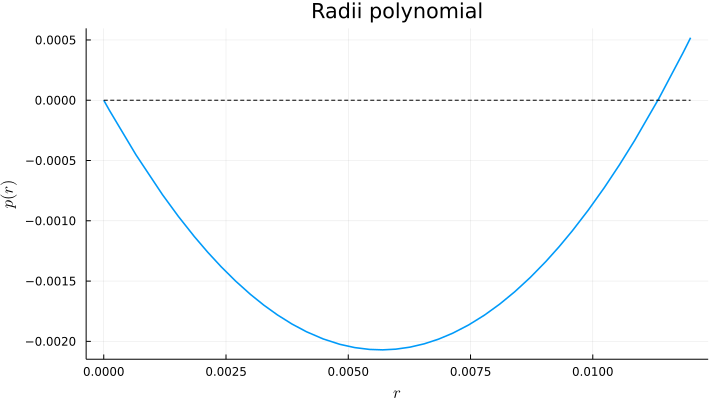

In [13]:
plot(rp,0,0.012,
    xlabel = "\$r\$",
    ylabel = "\$p\\,(r)\$",
    line   = 1.6,
    title  = "Radii polynomial",
    size   = (720,400),
    legend = false,
)
plot!(z->0,0,0.012,linestyle=:dash,linecolor=:black)

最後に得られた結果から、周期解の周期 $L$ を復元すると以下の区間に包含される。

In [14]:
@format standard 15
L = 2π/real(x[1]+sup(r0)*interval(-1,1));
println("L = $L")

L = [6.66328685832784, 6.66328686031842]


本資料は以下のような文献・Web ページ等を参考に書いています。

### 参考文献

1. Jan Bouwe van den Berg, Jean-Philippe Lessard, Proceedings of Symposia in Applied Mathematics 74, American Mathematical Society, 2018.<br>
(力学系におけるNewton-Kantorovich型定理を使った精度保証付き数値計算の教科書、フーリエ級数・チェビシェフ級数の畳み込みを使った実践例をいくつか紹介している)
1. 高橋和暉, 高安亮紀, [フーリエ級数](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Fourier_series.html), 2022.<br>
（FFTを利用したフーリエ補間の計算方法をJuliaで実装する例を紹介している）
1. 高橋和暉, 高安亮紀, [離散畳み込みの精度保証](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/discrete_convolution.html), 2022.<br>
（FFTを利用した離散畳み込みの計算方法とその精度保証付き数値計算方法をJuliaで実装する例を紹介している）
1. 高橋和暉, 高安亮紀, [フーリエ・スペクトル法による常微分方程式の周期解の数値計算](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Fourier_spectral_PO.html), 2022.<br>
（今回題材としたvan der Pol 方程式の周期解をフーリエ・スペクトル法をJuliaで実装した例を紹介している）

<div align="right">高橋和暉, <a href="http://www.risk.tsukuba.ac.jp/~takitoshi/">高安亮紀</a>，2022年4月4日</div>